**K-Nearest Neighbors (KNN)** is a simple yet powerful classification algorithm in machine learning.

**1. Data Analysis using Visualizations**
First, load the dataset and use some visualizations to understand its structure:

**Libraries:** Use pandas, matplotlib, and seaborn.                                  
**Steps:**
Visualize the distribution of different features (use histograms or bar charts).                                  
Use a correlation matrix (with a heatmap) to understand relationships between features.                                       
Check for class imbalances (e.g., countplot for the target variable).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv("/content/Zoo.csv")

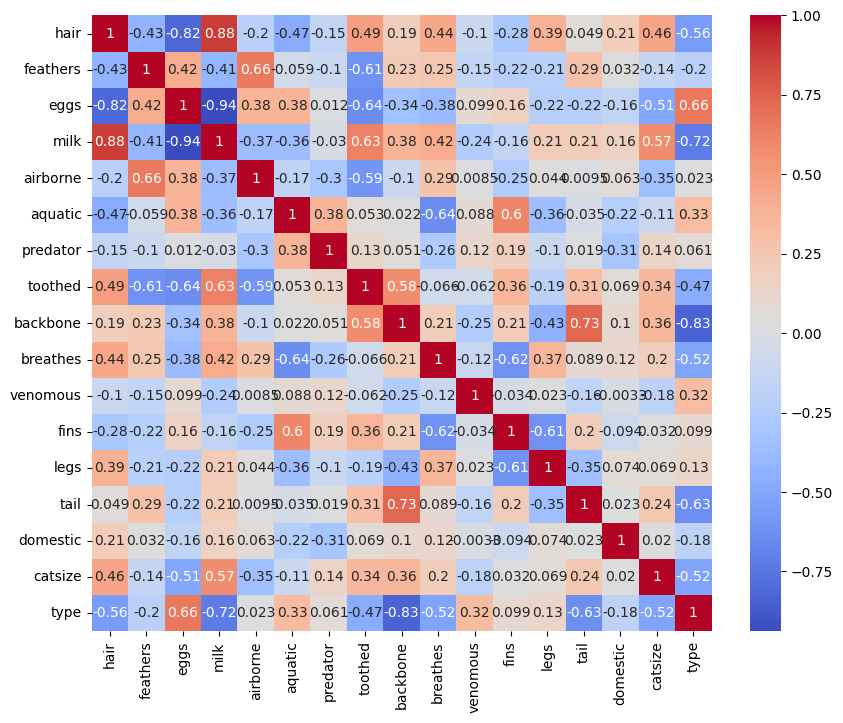

In [ ]:
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])
# Calculate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 2. Preprocessing the Data
**Handling Missing Values:** Check for missing data using isnull() and either drop or impute missing values.                                   
**Handling Outliers:** You can detect outliers using boxplots or z-scores and decide to remove or cap them.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

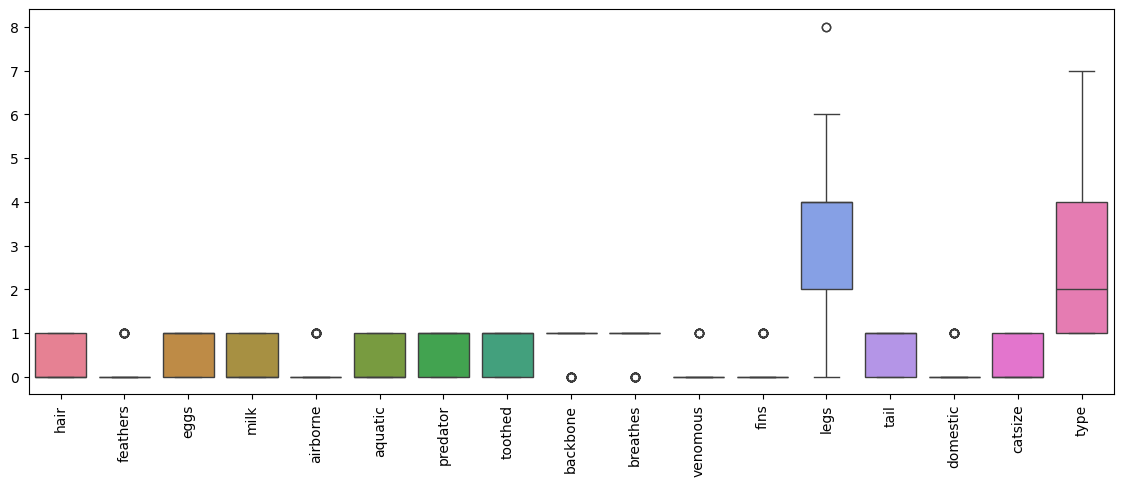

In [ ]:
# Visualization for outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

**3. Splitting the Dataset**                                 
Split the dataset into training and testing sets. The target column will likely be 'animal_type' or something similar.

In [ ]:
# Define X (features) and y (target)
# Check the actual column name for 'animal_type' in your DataFrame
# You might need to adjust it based on the actual name in your data.
# For example, if the column is named 'animal name', use:
X = data.drop('animal name', axis=1)  # Replace with the correct column name
y = data['animal name']              # Replace with the correct column name

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.*** Implementing K-Nearest Neighbours***                              
Use scikit-learn to implement the KNN algorithm.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the value of K
knn.fit(X_train, y_train)

KNeighborsClassifier()

**5. Choosing Distance Metric and Value for K**
Common distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance. You can experiment with different metrics:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')


Tune the n_neighbors parameter using cross-validation or grid search

**6. Evaluating the Classifier**                              
Use accuracy, precision, recall, and F1-score for evaluation:

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train defined somewhere
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

**7. Visualizing Decision Boundaries**                              
Decision boundaries for KNN can be visualized if you reduce the dataset to two dimensions (for example, using PCA)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)


In [ ]:
# Train KNN on reduced data
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train)


KNeighborsClassifier()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import pandas as pd # Import pandas

# Assuming you have X_train, X_test, and y_train defined somewhere

# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)

# Convert X_train to a Pandas DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)

# Convert X_train to numeric if it contains non-numeric data
X_train_numeric = X_train.select_dtypes(include=np.number)
X_train_2d = pca.fit_transform(X_train_numeric)


#Similarly for X_test
# Convert X_test to a Pandas DataFrame if it's not already
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

# Similarly, convert X_test to numeric
X_test_numeric = X_test.select_dtypes(include=np.number)
X_test_2d = pca.transform(X_test_numeric)

# Train KNN on reduced data
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train)

KNeighborsClassifier()

# Interview Questions

  **1. What are the key hyperparameters in KNN?  **               
**Key Hyperparameters in KNN:**
n_neighbors (K): The number of nearest neighbors to consider.
metric: The distance metric (e.g., Euclidean, Manhattan).
weights: How to weight the neighbors' votes (uniform or distance-based).

**2. What distance metrics can be used in KNN? **                                            
**Distance Metrics in KNN:**

Euclidean distance: The straight-line distance between points.
Manhattan distance: The sum of absolute differences between points.
Minkowski distance: A generalization of both Euclidean and Manhattan distances.


